In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
target_response_path = "/data/mouse/dynamic21608-2-18-Video-b448915027fa4aa145acc0c00199ff15/responses"

In [24]:
from pathlib import Path
import yaml
import numpy as np
from experanto.intervals import TimeInterval

# Convert string path to Path object
target_response_path = Path(target_response_path)

meta = yaml.safe_load((target_response_path / "meta.yml").open("r"))

start_time = meta["start_time"]
end_time = meta["end_time"]
use_phase_shifts = meta["phase_shift_per_signal"]

if meta["phase_shift_per_signal"]:
    phase_shifts = np.load(target_response_path / "meta/phase_shifts.npy")
    valid_interval = TimeInterval(
        start_time + np.max(phase_shifts),
        end_time + np.min(phase_shifts),
    )
n_signals = meta["n_signals"]

# read .npy or .mem (memmap) file
if (target_response_path / "data.npy").exists():
    data = np.load(target_response_path / "data.npy")
else:
    data = np.memmap(
        target_response_path / "data.mem",
        dtype=meta["dtype"],
        mode="r",
        shape=(meta["n_timestamps"], meta["n_signals"]),
    )
    data = np.array(data)

mean = np.load(target_response_path / "meta/means.npy")
std = np.load(target_response_path / "meta/stds.npy")

data_normalized = (data - mean) / std


In [25]:
data_normalized.shape

(52689, 7269)

In [22]:
mean.shape

(1, 7269)

In [23]:
std.shape

(1, 7269)

In [7]:
start_time

1556056322.2848358

In [10]:
T = (end_time - start_time) / meta["n_timestamps"]

In [11]:
1/T

8.08073429295768

In [6]:
data.shape

(52689, 7269)

In [18]:
print(np.max(data))

1302.3135986328125


In [19]:
print(np.min(data))

-5.3607585925874446e-08


In [29]:
print(np.max(data_normalized))
print(np.min(data_normalized))
print(np.mean(data_normalized))
print(np.std(data_normalized))


130.67834571871722
-0.18673971476923687
-0.08909463042537008
0.7270745956055965


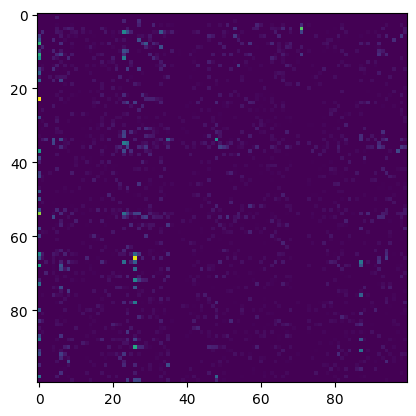

In [26]:
import matplotlib.pyplot as plt
plt.imshow(data_normalized[:100, :100])